In [3]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

In [ ]:
# Parameters
N = 33  # number of vertices on the cycle
tau_values = { '0': 0, '1': 2 }  # liveliness parameters for binary bits (example)
coin_dim = 3

# Initial state: position and coin state (uniform superposition over coin states)
pos0 = 0
coin0 = (1/np.sqrt(3)) * (qt.basis(coin_dim, 0) + qt.basis(coin_dim, 1) + qt.basis(coin_dim, 2))
psi0 = qt.tensor(qt.basis(N, pos0), coin0)

def shift_operator(N, tau):
    S = sum(
        qt.tensor(qt.basis(N, (x+1)%N)*qt.basis(N, x).dag(), qt.basis(coin_dim, 0)*qt.basis(coin_dim,0).dag()) +
        qt.tensor(qt.basis(N, (x-1)%N)*qt.basis(N, x).dag(), qt.basis(coin_dim, 1)*qt.basis(coin_dim,1).dag()) +
        qt.tensor(qt.basis(N, (x+tau)%N)*qt.basis(N, x).dag(), qt.basis(coin_dim, 2)*qt.basis(coin_dim,2).dag())
        for x in range(N)
    )
    return S

G = (2/3)*np.ones((coin_dim, coin_dim)) - np.eye(coin_dim)
coin_operator = qt.tensor(qt.qeye(N), qt.Qobj(G))

def evolution_operator(N, bit, tau_values):
    tau = tau_values[bit]
    return shift_operator(N, tau) * coin_operator

def controlled_quantum_walk_hash(msg, N, psi0, tau_values):
    psi = psi0
    for bit in msg:
        U = evolution_operator(N, bit, tau_values)
        psi = U * psi
    return psi

def generate_hash(psi_final, N, s=8, l=10):
    prob_dist = np.abs(psi_final.full())**2
    prob_pos = np.sum(prob_dist.reshape(N, coin_dim), axis=1).flatten()
    hash_bits = ''
    for p in prob_pos:
        scaled_p = int((p * 10**l) % (2**s))
        hash_bits += format(scaled_p, '0' + str(s) + 'b')
    return hash_bits

# Example message
message = "{0:b}".format(5)

# Initial state defined previously (psi0)
psi_final = controlled_quantum_walk_hash(message, N, psi0, tau_values)

# Generate hash value (with parameters s=8, l=10 as an example)
hash_value = generate_hash(psi_final, N, s=8, l=10)

#print("Hash value:", hash_value)
print("Int:", int(hash_value, 2))

Int: 20459080389905450181725333566832952201154338465586722480130353215014955330794810
Int: 28409228053954945914392329590929065266890665443070988955665675729985405645692218


Int: 0
Int: 1005025
Int: 2010050
Int: 3015075
Int: 4020100
Int: 5025125
Int: 6030150
Int: 7035175
Int: 8040201
Int: 9045226
Int: 10050251
Int: 11055276
Int: 12060301
Int: 13065326
Int: 14070351
Int: 15075376
Int: 16080402
Int: 17085427
Int: 18090452
Int: 19095477
Int: 20100502
Int: 21105527
Int: 22110552
Int: 23115577
Int: 24120603
Int: 25125628
Int: 26130653
Int: 27135678
Int: 28140703
Int: 29145728
Int: 30150753
Int: 31155778
Int: 32160804
Int: 33165829
Int: 34170854
Int: 35175879
Int: 36180904
Int: 37185929
Int: 38190954
Int: 39195979
Int: 40201005
Int: 41206030
Int: 42211055
Int: 43216080
Int: 44221105
Int: 45226130
Int: 46231155
Int: 47236180
Int: 48241206
Int: 49246231
Int: 50251256
Int: 51256281
Int: 52261306
Int: 53266331
Int: 54271356
Int: 55276381
Int: 56281407
Int: 57286432
Int: 58291457
Int: 59296482
Int: 60301507
Int: 61306532
Int: 62311557
Int: 63316582
Int: 64321608
Int: 65326633
Int: 66331658
Int: 67336683
Int: 68341708
Int: 69346733
Int: 70351758
Int: 71356783
Int: 723

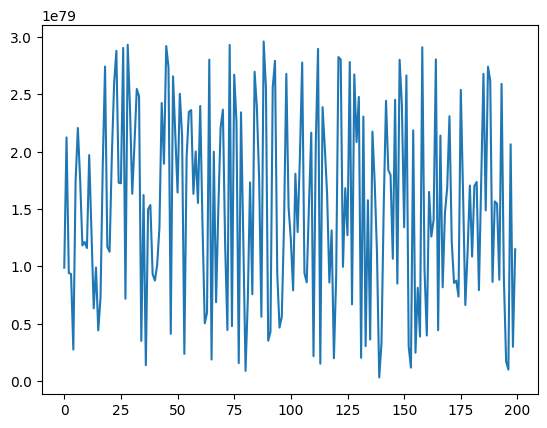

In [5]:
indices = np.linspace(0, 2e8, 200)
list = []

for i in indices:
    i = int(i)
    message = "{0:b}".format(i)
    psi_final = controlled_quantum_walk_hash(message, N, psi0, tau_values)
    hash_value = generate_hash(psi_final, N, s=8, l=10)
    list.append(int(hash_value, 2))
    print("Int:", i)

plt.plot(list)

In [9]:
import hashlib
from collections import Counter
import seaborn as sns

Generating 1000 random inputs of length 16...
Computing hashes...


100%|██████████| 1000/1000 [03:13<00:00,  5.17it/s]


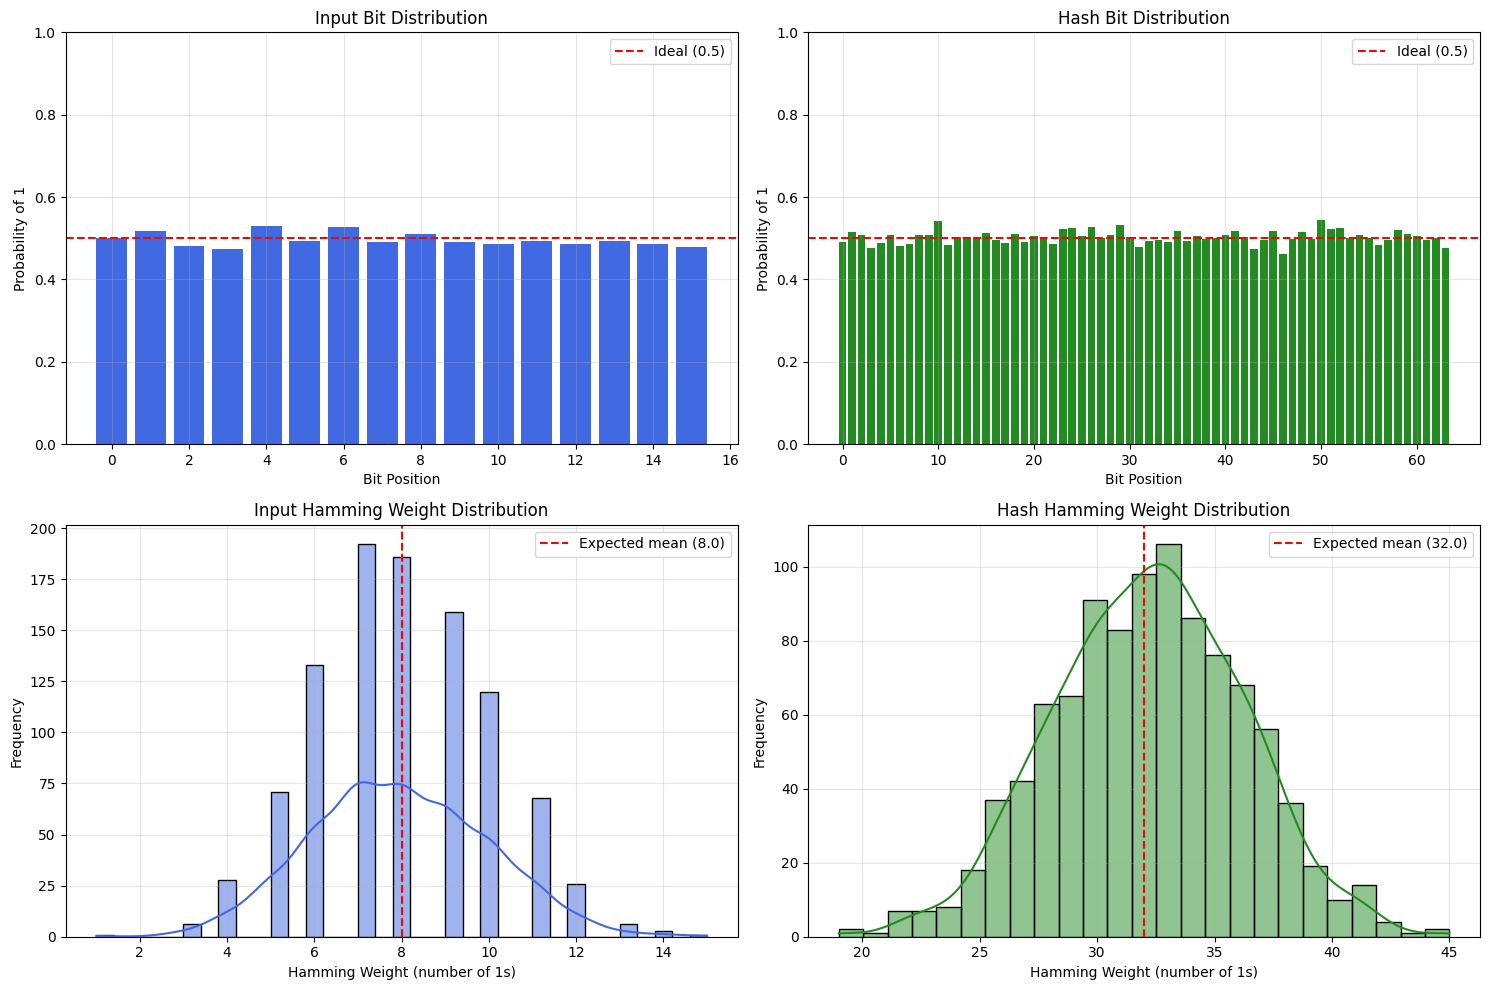


Input statistics:
Mean Hamming weight: 7.9420 (Expected: 8.0)
Standard deviation: 1.9952

Hash statistics:
Mean Hamming weight: 32.1860 (Expected: 32.0)
Standard deviation: 3.9987

Chi-square test value for hash bit distribution: 32.3320
Lower values indicate better uniformity
Generating 1000 random inputs of length 16...
Computing hashes...


100%|██████████| 1000/1000 [03:12<00:00,  5.20it/s]


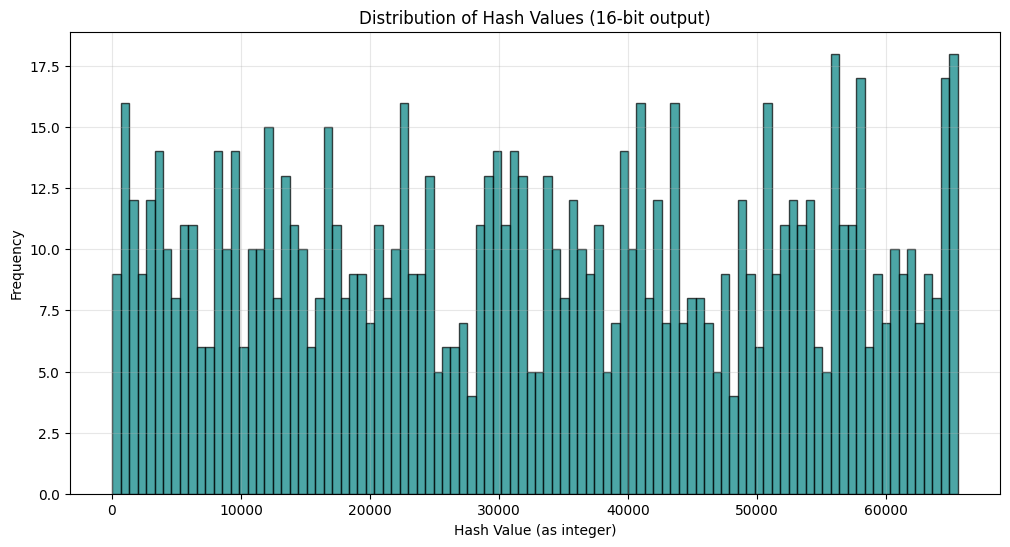


Hash value distribution statistics (using 16 bits):
Total samples: 1000
Unique hash values: 982 (98.20%)
Maximum occurrence of any value: 2
Collision rate: 1.8000%
Expected collision rate for ideal hash: 99.9510%


In [10]:
def analyze_bit_distributions(input_length=16, num_samples=1000, hash_length=None):
    """
    Analyze and visualize the distribution of bits in inputs and their hashes.
    
    Args:
        input_length: Length of random binary input strings
        num_samples: Number of input samples to generate
        hash_length: Optional parameter to truncate hash output for visualization
    """
    # Generate input strings
    print(f"Generating {num_samples} random inputs of length {input_length}...")
    inputs = [generate_random_binary_string(input_length) for _ in range(num_samples)]
    
    # Count 1s in each position of inputs
    input_ones_count = np.zeros(input_length)
    for input_str in inputs:
        for i, bit in enumerate(input_str):
            if bit == '1':
                input_ones_count[i] += 1
    
    # Compute input bit distribution
    input_bit_distribution = input_ones_count / num_samples
    
    # Generate hashes
    print("Computing hashes...")
    hashes = []
    for input_str in tqdm(inputs):
        psi_final = controlled_quantum_walk_hash(input_str, N, psi0, tau_values)
        hash_output = generate_hash(psi_final, N)
        hashes.append(hash_output)
    
    # Get hash length from first hash
    actual_hash_length = len(hashes[0])
    
    # If hash_length is specified, truncate hashes
    if hash_length and hash_length < actual_hash_length:
        hashes = [h[:hash_length] for h in hashes]
        actual_hash_length = hash_length
    
    # Count 1s in each position of hashes
    hash_ones_count = np.zeros(actual_hash_length)
    for hash_str in hashes:
        for i, bit in enumerate(hash_str):
            if bit == '1':
                hash_ones_count[i] += 1
    
    # Compute hash bit distribution
    hash_bit_distribution = hash_ones_count / num_samples
    
    # Create plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Input bit distribution
    ax1 = axes[0, 0]
    ax1.bar(range(input_length), input_bit_distribution, color='royalblue')
    ax1.axhline(y=0.5, color='r', linestyle='--', label='Ideal (0.5)')
    ax1.set_xlabel('Bit Position')
    ax1.set_ylabel('Probability of 1')
    ax1.set_title('Input Bit Distribution')
    ax1.set_ylim(0, 1)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Hash bit distribution
    ax2 = axes[0, 1]
    ax2.bar(range(actual_hash_length), hash_bit_distribution, color='forestgreen')
    ax2.axhline(y=0.5, color='r', linestyle='--', label='Ideal (0.5)')
    ax2.set_xlabel('Bit Position')
    ax2.set_ylabel('Probability of 1')
    ax2.set_title('Hash Bit Distribution')
    ax2.set_ylim(0, 1)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Input Hamming weight distribution
    input_weights = [input_str.count('1') for input_str in inputs]
    ax3 = axes[1, 0]
    sns.histplot(input_weights, kde=True, ax=ax3, color='royalblue')
    ax3.axvline(x=input_length/2, color='r', linestyle='--', 
                label=f'Expected mean ({input_length/2})')
    ax3.set_xlabel('Hamming Weight (number of 1s)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Input Hamming Weight Distribution')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Hash Hamming weight distribution
    hash_weights = [hash_str.count('1') for hash_str in hashes]
    ax4 = axes[1, 1]
    sns.histplot(hash_weights, kde=True, ax=ax4, color='forestgreen')
    ax4.axvline(x=actual_hash_length/2, color='r', linestyle='--', 
                label=f'Expected mean ({actual_hash_length/2})')
    ax4.set_xlabel('Hamming Weight (number of 1s)')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Hash Hamming Weight Distribution')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('quantum_walk_hash_distributions.png', dpi=300)
    plt.show()
    
    # Print statistics
    print("\nInput statistics:")
    print(f"Mean Hamming weight: {np.mean(input_weights):.4f} (Expected: {input_length/2})")
    print(f"Standard deviation: {np.std(input_weights):.4f}")
    
    print("\nHash statistics:")
    print(f"Mean Hamming weight: {np.mean(hash_weights):.4f} (Expected: {actual_hash_length/2})")
    print(f"Standard deviation: {np.std(hash_weights):.4f}")
    
    # Calculate chi-square test for hash bit distribution
    expected = num_samples * 0.5  # Expected count of 1s at each position
    chi_square = np.sum((hash_ones_count - expected)**2 / expected)
    print(f"\nChi-square test value for hash bit distribution: {chi_square:.4f}")
    print("Lower values indicate better uniformity")

def analyze_hash_output_distribution(input_length=16, num_samples=1000, output_size=16):
    """
    Analyze the distribution of hash output values.
    
    Args:
        input_length: Length of random binary input strings
        num_samples: Number of input samples to generate
        output_size: Number of bits to use from hash output for analysis
    """
    print(f"Generating {num_samples} random inputs of length {input_length}...")
    inputs = [generate_random_binary_string(input_length) for _ in range(num_samples)]
    
    # Generate hashes and convert to integer values for analysis
    print("Computing hashes...")
    hash_values = []
    for input_str in tqdm(inputs):
        psi_final = controlled_quantum_walk_hash(input_str, N, psi0, tau_values)
        hash_output = generate_hash(psi_final, N)
        # Take first output_size bits and convert to integer
        truncated_hash = hash_output[:output_size]
        hash_value = int(truncated_hash, 2)
        hash_values.append(hash_value)
    
    # Ideal hash function would have uniform distribution across all possible values
    # Create histogram
    plt.figure(figsize=(12, 6))
    
    # Define bins based on output size
    num_bins = min(2**output_size, 100)  # Limit bins for visualization
    
    # Plot histogram of hash values
    plt.hist(hash_values, bins=num_bins, color='teal', alpha=0.7, edgecolor='black')
    plt.xlabel('Hash Value (as integer)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Hash Values ({output_size}-bit output)')
    plt.grid(True, alpha=0.3)
    plt.savefig('quantum_walk_hash_value_distribution.png', dpi=300)
    plt.show()
    
    # Count occurrences of each value
    value_counts = Counter(hash_values)
    
    # Calculate statistics
    unique_values = len(value_counts)
    max_count = max(value_counts.values())
    collision_rate = 1 - (unique_values / num_samples)
    
    print(f"\nHash value distribution statistics (using {output_size} bits):")
    print(f"Total samples: {num_samples}")
    print(f"Unique hash values: {unique_values} ({unique_values/num_samples*100:.2f}%)")
    print(f"Maximum occurrence of any value: {max_count}")
    print(f"Collision rate: {collision_rate*100:.4f}%")
    
    # Calculate expected collision rate for comparison
    # Birthday paradox approximation: 1 - e^(-n(n-1)/(2*m)) where n=samples, m=possible values
    expected_collision_rate = 1 - np.exp(-num_samples*(num_samples-1)/(2*(2**output_size)))
    print(f"Expected collision rate for ideal hash: {expected_collision_rate*100:.4f}%")

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
input_length = 16       # Length of input strings
num_samples = 1000      # Number of samples to generate
hash_bit_length = 64    # Number of bits to analyze from hash (for visualization)

# Analyze bit distributions
analyze_bit_distributions(input_length, num_samples, hash_bit_length)

# Analyze hash output distribution
analyze_hash_output_distribution(input_length, num_samples, output_size=16)

In [ ]:

# Use previous definitions of shift_operator, coin_operator, evolution_operator, controlled_quantum_walk_hash, generate_hash

# Collision test function
def collision_test(msg_length=20, num_tests=1500, s=8, l=10):
    collisions = 0
    hash_dict = {}

    length = 20
    distinct_samples = np.random.choice(np.linspace(0, 2**length - 1, 2**length), size=1000, replace=False)

    for sample in distinct_samples:
        msg = format(int(sample), f'0{length}b')
        psi_final = controlled_quantum_walk_hash(msg, N, psi0, tau_values)
        hash_val = generate_hash(psi_final, N, s, l)

        # print(f"Message: {msg}, Hash: {hash_val}")
        if hash_val in hash_dict:
            collisions += 1
        else:
            hash_dict[hash_val] = msg

    collision_rate = collisions / num_tests
    print(f'Total tests: {num_tests}')
    print(f'Collisions detected: {collisions}')
    print(f'Collision rate: {collision_rate:.4f}')


# Run collision test
collision_test(msg_length=20, num_tests=1000, s=8, l=10)

Total tests: 1000
Collisions detected: 0
Collision rate: 0.0000


Pre-calculating evolution operators...
Running timing analysis with 5 trials per input length...


  6%|▋         | 1/16 [00:00<00:05,  2.71it/s]

Input length: 8 bits | Avg. time: 0.073484s | Std dev: 0.003449s


 12%|█▎        | 2/16 [00:01<00:08,  1.72it/s]

Input length: 16 bits | Avg. time: 0.145249s | Std dev: 0.001704s


 19%|█▉        | 3/16 [00:02<00:10,  1.20it/s]

Input length: 24 bits | Avg. time: 0.225840s | Std dev: 0.006726s


 25%|██▌       | 4/16 [00:03<00:13,  1.13s/it]

Input length: 32 bits | Avg. time: 0.314963s | Std dev: 0.012652s


 31%|███▏      | 5/16 [00:05<00:15,  1.38s/it]

Input length: 40 bits | Avg. time: 0.366101s | Std dev: 0.011867s


 38%|███▊      | 6/16 [00:08<00:17,  1.74s/it]

Input length: 48 bits | Avg. time: 0.487233s | Std dev: 0.018594s


 44%|████▍     | 7/16 [00:10<00:18,  2.03s/it]

Input length: 56 bits | Avg. time: 0.526908s | Std dev: 0.021141s


 50%|█████     | 8/16 [00:13<00:19,  2.39s/it]

Input length: 64 bits | Avg. time: 0.628344s | Std dev: 0.053345s


 56%|█████▋    | 9/16 [00:17<00:19,  2.72s/it]

Input length: 72 bits | Avg. time: 0.689731s | Std dev: 0.042769s


 62%|██████▎   | 10/16 [00:20<00:18,  3.02s/it]

Input length: 80 bits | Avg. time: 0.738861s | Std dev: 0.014624s


 69%|██████▉   | 11/16 [00:25<00:16,  3.40s/it]

Input length: 88 bits | Avg. time: 0.848373s | Std dev: 0.045973s


 75%|███████▌  | 12/16 [00:29<00:15,  3.79s/it]

Input length: 96 bits | Avg. time: 0.938789s | Std dev: 0.064015s


 81%|████████▏ | 13/16 [00:34<00:12,  4.10s/it]

Input length: 104 bits | Avg. time: 0.960127s | Std dev: 0.019800s


 88%|████████▊ | 14/16 [00:39<00:08,  4.43s/it]

Input length: 112 bits | Avg. time: 1.039560s | Std dev: 0.032712s


 94%|█████████▍| 15/16 [00:45<00:04,  4.86s/it]

Input length: 120 bits | Avg. time: 1.171644s | Std dev: 0.055188s


100%|██████████| 16/16 [00:51<00:00,  3.23s/it]

Input length: 128 bits | Avg. time: 1.183918s | Std dev: 0.018434s

Average time per bit: 0.00948801 seconds
Overall average execution time: 0.646195 seconds


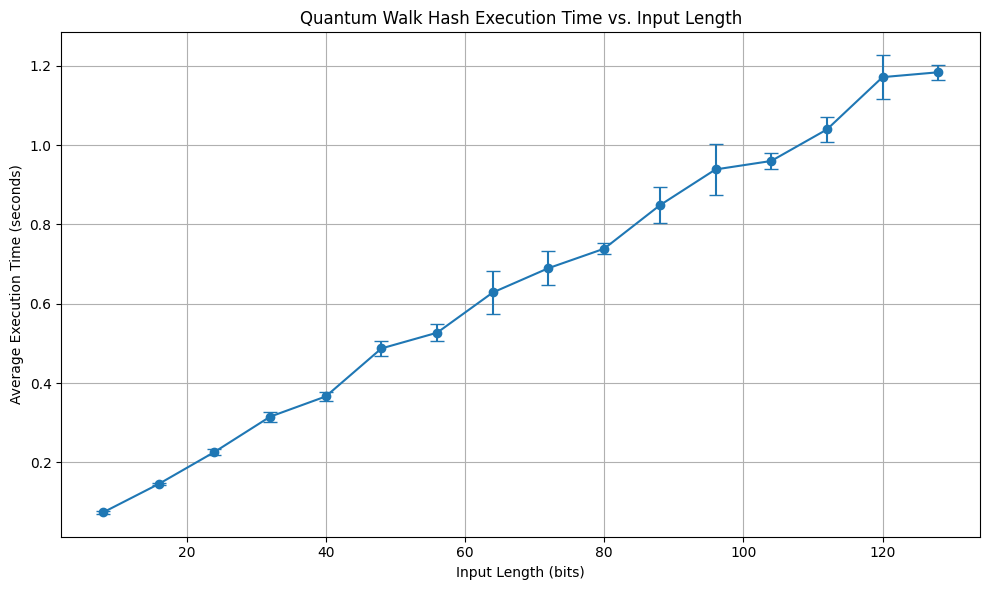

Pandas not available. Results not saved to CSV.


In [6]:
import time
import statistics
from tqdm import tqdm
# Computational Time Test

def generate_random_binary_string(length):
    """Generate a random binary string of specified length."""
    return ''.join(np.random.choice(['0', '1']) for _ in range(length))

def measure_hash_time(input_length, trials=5):
    """Measure time to generate hash for input of specified bit length."""
    times = []
    
    for _ in range(trials):
        binary_input = generate_random_binary_string(input_length)
        
        start_time = time.time()
        psi_final = controlled_quantum_walk_hash(binary_input, N, psi0, tau_values)
        hash_output = generate_hash(psi_final, N)
        end_time = time.time()
        
        execution_time = end_time - start_time
        times.append(execution_time)
    
    avg_time = statistics.mean(times)
    std_dev = statistics.stdev(times) if trials > 1 else 0
    
    return avg_time, std_dev

def run_timing_analysis(min_length=8, max_length=128, step=8, trials=5):
    """Run timing analysis for different input bit lengths."""
    input_lengths = range(min_length, max_length + 1, step)
    avg_times = []
    std_devs = []
    
    print(f"Running timing analysis with {trials} trials per input length...")
    for length in tqdm(input_lengths):
        avg_time, std_dev = measure_hash_time(length, trials)
        avg_times.append(avg_time)
        std_devs.append(std_dev)
        print(f"Input length: {length} bits | Avg. time: {avg_time:.6f}s | Std dev: {std_dev:.6f}s")
    
    return input_lengths, avg_times, std_devs

def plot_timing_results(input_lengths, avg_times, std_devs):
    """Plot the timing results."""
    plt.figure(figsize=(10, 6))
    plt.errorbar(input_lengths, avg_times, yerr=std_devs, fmt='-o', capsize=5)
    plt.xlabel('Input Length (bits)')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title('Quantum Walk Hash Execution Time vs. Input Length')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('quantum_walk_hash_timing.png')
    plt.show()

# Set parameters for timing analysis
min_length = 8    # Minimum input length in bits
max_length = 128  # Maximum input length in bits
step = 8          # Step size for input length
trials = 5        # Number of trials for each input length

# Pre-calculate evolution operators for 0 and 1 bits to speed up analysis
print("Pre-calculating evolution operators...")
evolution_op_0 = evolution_operator(N, '0', tau_values)
evolution_op_1 = evolution_operator(N, '1', tau_values)

# Run timing analysis
input_lengths, avg_times, std_devs = run_timing_analysis(min_length, max_length, step, trials)

# Calculate and display average time per bit
time_per_bit = [time/length for time, length in zip(avg_times, input_lengths)]
average_time_per_bit = statistics.mean(time_per_bit)
print(f"\nAverage time per bit: {average_time_per_bit:.8f} seconds")

# Display overall average time
overall_avg_time = statistics.mean(avg_times)
print(f"Overall average execution time: {overall_avg_time:.6f} seconds")

# Plot results
try:
    plot_timing_results(input_lengths, avg_times, std_devs)
except ImportError:
    print("Matplotlib not available. Skipping plot generation.")

# Save results to CSV
try:
    import pandas as pd
    results_df = pd.DataFrame({
        'Input_Length': input_lengths,
        'Avg_Time': avg_times,
        'Std_Dev': std_devs,
        'Time_Per_Bit': time_per_bit
    })
    results_df.to_csv('quantum_walk_hash_timing_results.csv', index=False)
    print("Results saved to 'quantum_walk_hash_timing_results.csv'")
except ImportError:
    print("Pandas not available. Results not saved to CSV.")
